<a href="https://colab.research.google.com/github/ne-choi/study/blob/main/python/kaggle/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Practice Kaggle Data**


1. 구글 드라이브 연동
2. Kaggle API 설치
3. Kaggle Token 다운로드
4. Titanic 데이터 불러오기

## 1. 구글 드라이브 연동
Google Colab을 시작하면 항상 드라이브 연동을 해야 한다.

In [ ]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/Python/python/practice' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Python/python/practice


아래 코드 실행 시, 에러가 없다면 데이터를 불러오면 된다.

In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/Python/python/practice


## 2. Kaggle API 설치
Google Colab에서 Kaggle API를 불러오는 소스코드를 실행한다.

In [ ]:
!pip install kaggle # Google Colab에서 설치할 때는 ! 필요

## 3. Kaggle Token 다운로드
Kaggle에서 API Token을 다운로드한다.  
[Kaggle] - [My Account] - [API] - [Create New API Token]을 누르면 kaggle.json 파일이 다운로드 된다.  
파일을 바탕화면에 옮긴 뒤, 아래 코드를 실행한다.  

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 62 bytes


아래 코드를 실행했을 때, 에러 메시지가 없으면 json 파일이 성공적으로 업로드 되었다는 뜻이다.

In [ ]:
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


## 4. Kaggle 데이터 불러오기

Kaggle competition list를 불러온다.



In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        185           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        315           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2356           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18058            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4536            True  
connectx

코드 실행 시 나오는 대회 목록에서 원하는 대회의 데이터셋을 불러온다.

In [ ]:
# 실습: 타이타닉 데이터 불러오기
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.18MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 443kB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.97MB/s]


In [ ]:
!ls # ls: 리눅스 명령어, 경로 내 모든 데이터 파일을 보여줌

gender_submission.csv  test.csv  train.csv


총 3개의 데이터가 다운로드 되었다.
- gender_submission.csv
- test.csv
- train.csv

# **II. Kaggle Data 실습_Titanic**

1. 데이터 살펴보기
2. Kaggle Code 필사

## 1. 데이터 살펴보기
아래 코드를 실행하여 EDA 필수 패키지를 설치한다.

In [ ]:
import pandas as pd # 데이터 가공, 변환
import pandas_profiling # 보고서 기능
import numpy as np # 수치 연산&배열, 행렬
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt # 시각화
from matplotlib.pyplot import figure # 시각화
import seaborn as sns

from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

(1) 데이터 수집
- gender_submission.csv
- test.csv
- train.csv

In [ ]:
gender = pd.read_csv('data/gender_submission.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
print("data import is done")

data import is done


(2) 데이터 확인
Kaggle 데이터를 불러와서 가장 먼저 확인해야 할 것은 데이터셋의 크기다.
- 변수의 개수
- Numeric 변수 & Categorical 변수의 개수 등 파악  
   cf) 보통 test 데이터의 변수 개수가 train 변수 개수보다 하나 적음

In [ ]:
gender.shape, train.shape, test.shape

((418, 2), (891, 12), (418, 11))

In [ ]:
# train 데이터의 상위 5개 데이터만 확인해보기
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Numerical 변수와 Categorical 변수를 구분한다.
- numeric_features 구분

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

numeric_features = test.select_dtypes(include=[np.number])
print(numeric_features.columns)
print("The total number of numeric features are: ", len(numeric_features.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
The total number of numeric features are:  7
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
The total number of numeric features are:  6


train의 numeric 데이터는 7개, test의 numeric 데이터는 6개이다.  
<br>

* numeric_features 제외한 나머지 변수 추출

In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of non numeric features are: ", len(categorical_features.columns))

categorical_features = test.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
print("The total number of non numeric features are: ", len(categorical_features.columns))

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
The total number of non numeric features are:  5
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
The total number of non numeric features are:  5


train의 numeric 아닌 데이터는 5개, test의 numeric 아닌 데이터는 5개이다.  

### 2. Kaggle Code 필사
[- 필사 자료: EDA to Prediction(DieTanic)](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

#### part1: Exploratory Data Analysis(EDA)
1. Analysis of the features
2. Finding any relations or trends considering multiple features

In [ ]:
# 사용 함수 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The `AGE, Cabin and Embarked` have null values.

How many Survived?

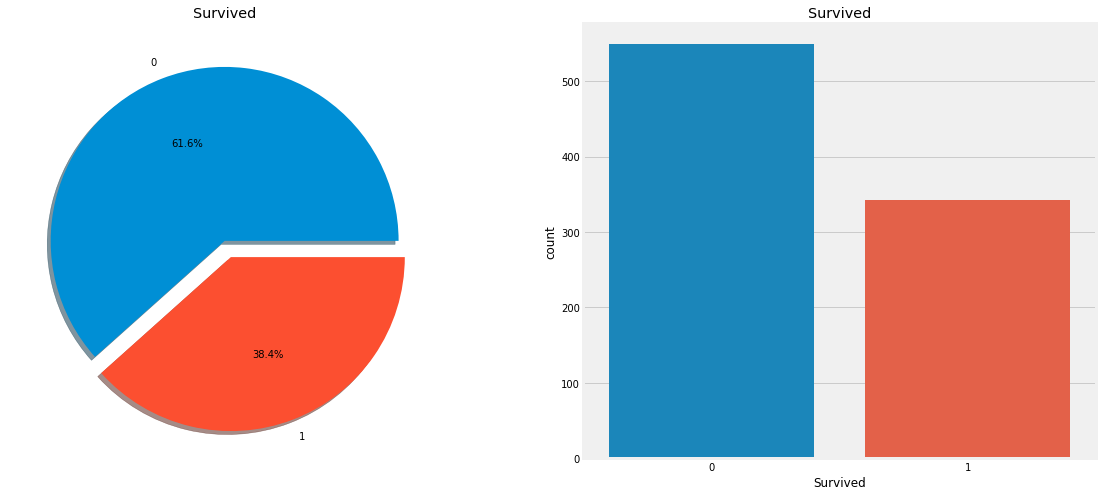

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived') # 왼쪽 그래프 제목
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.  

Out of 891 passengers in traing set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.  

We will try to chek the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.  

First let us understand the different types of features.

*** Types Of Features**

- Categorical Features:  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables(명목형 변수).  

- Categorical Features in the dataset: Sex, Embarked

<br>

- Ordinal Features:  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: if we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.  

- Ordinal(순위) Features in the dataset: PClass

<br>

- Continuous Feature:  
A feature is said to be continous if it can take values between any two points or between the minimun or maximum values in the features column.  

- Coutinuous Features in the dataset: Age

*** Analysing The Features**

Sex -> Catagorical Feature

In [ ]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

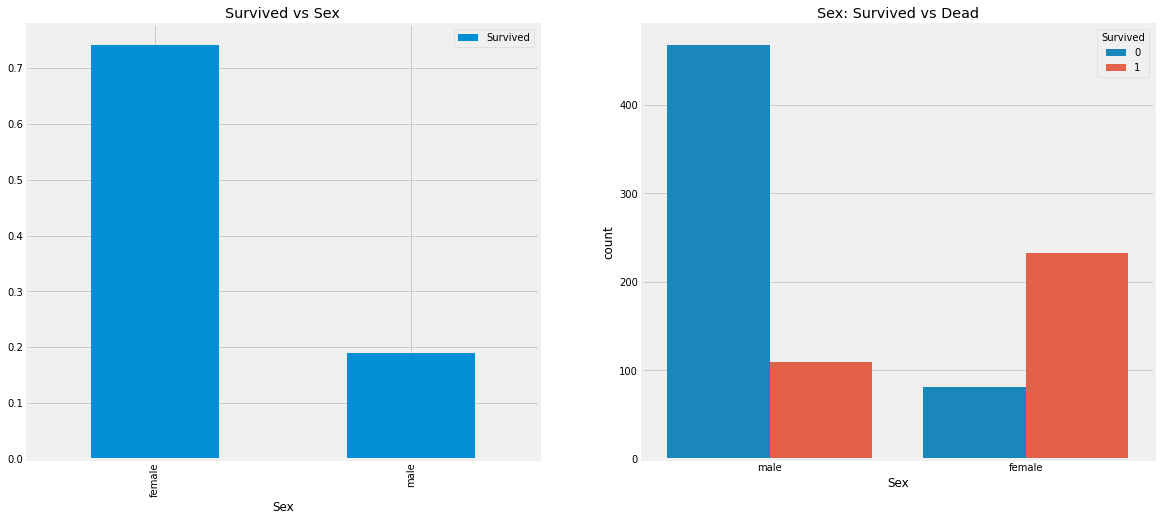

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.  

This looks to be a very important feature for modeling. But is it the best? Let's check other features.

*** Pclass -> Ordinal Feature**

In [ ]:
# 클래스별 사망자/생존자 수
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


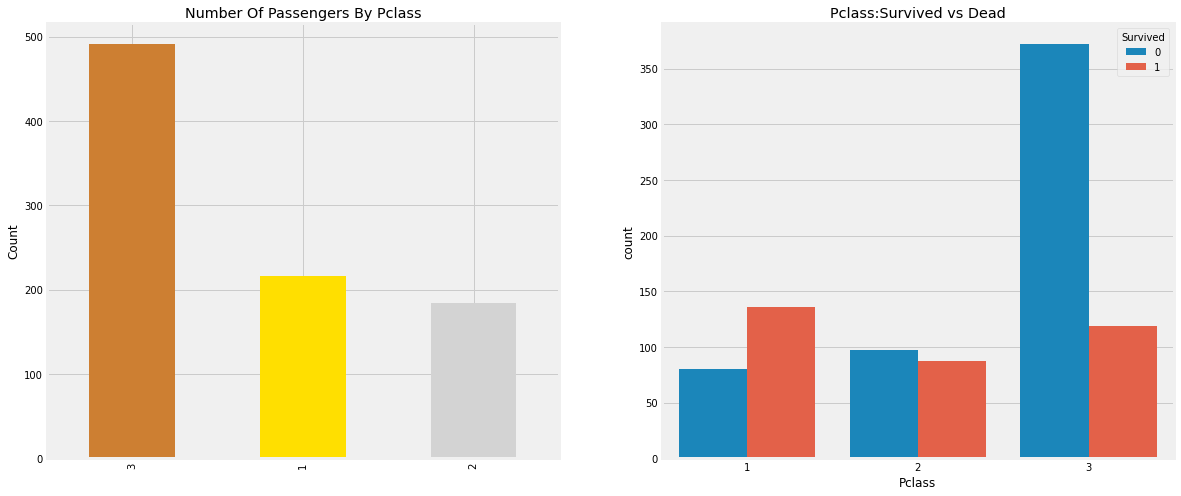

In [ ]:
f, ax=plt.subplots(1, 2, figsize = (18, 8))
train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even thouugh the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.  

For Pclass 1% survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.  

Let's dive in little bit more and check for other interesting observations. Let's check survival rate with Sex and Pclass Together.

In [ ]:
# Sex, Pclss 기준으로 Survived 인원 보기
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

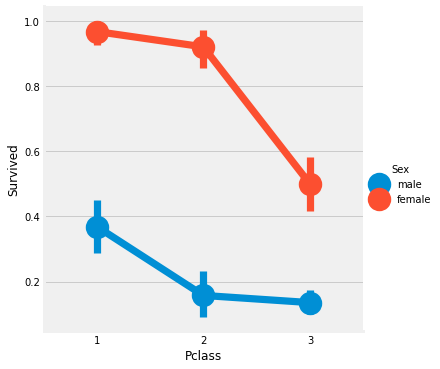

In [ ]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = train)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.  

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass 1 died.  

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.  

Looks like Pclass is also an important feature. Let's analyse other features.

*** Age -> Continous Feature**

In [ ]:
print('Oldest Passenger was of:', train['Age'].max(), 'Years')
print('Youngest Passenger was of:', train['Age'].min(), 'Years')
print('Average Age on the ship:', train['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


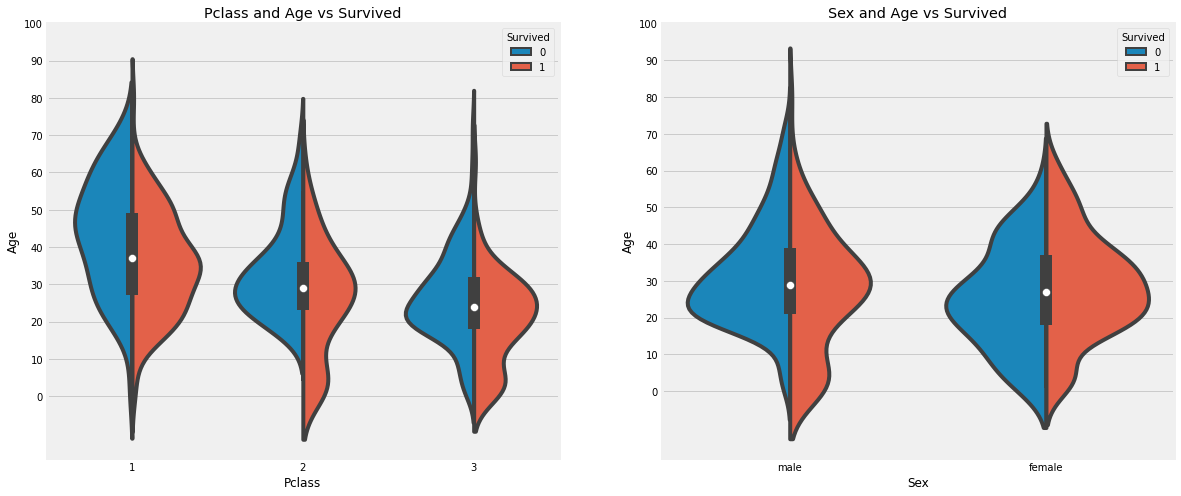

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**
- The number of cildren increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.  

- Survival chances for passengers aged 20-50 from Pclass 1 is high and is even better for women.  

- For males, the survival chances decreases with an increase in age.  

<br>

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.  

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?  

<br>

We can check the **Name** feature. Looking upon the feature, we cas see that the names have a salutaion like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.  

**"What's in a name?" ----> Feature**


In [ ]:
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') # extract the Salutations

Using the Regex: **[A-Za-z]+)**.. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

In [ ]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap='summer_r') # checking the Initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are some misspelled Initials like Mlle of Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [ ]:
train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [ ]:
train.groupby('Initial')['Age'].mean() # check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Filling NaN Ages**  

In [ ]:
# assigning the NaN Values with the Ceil values of the mean ages
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [ ]:
train.Age.isnull().any() # so no null values left finally

False

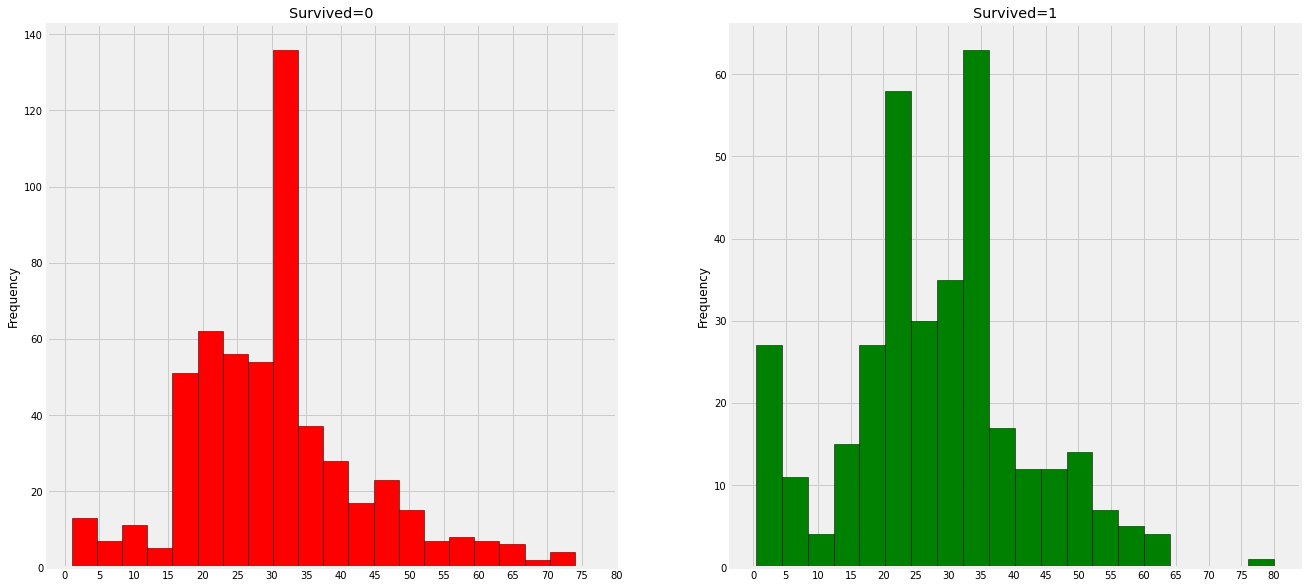

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(20, 10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**
- The Toddlers(age < 5) were saved in large numbers(*The Women and Child First Policy*)  
- The oldest Passenger was saved(80 years)  
- Maximum number of deaths were in the age group of 30-40  


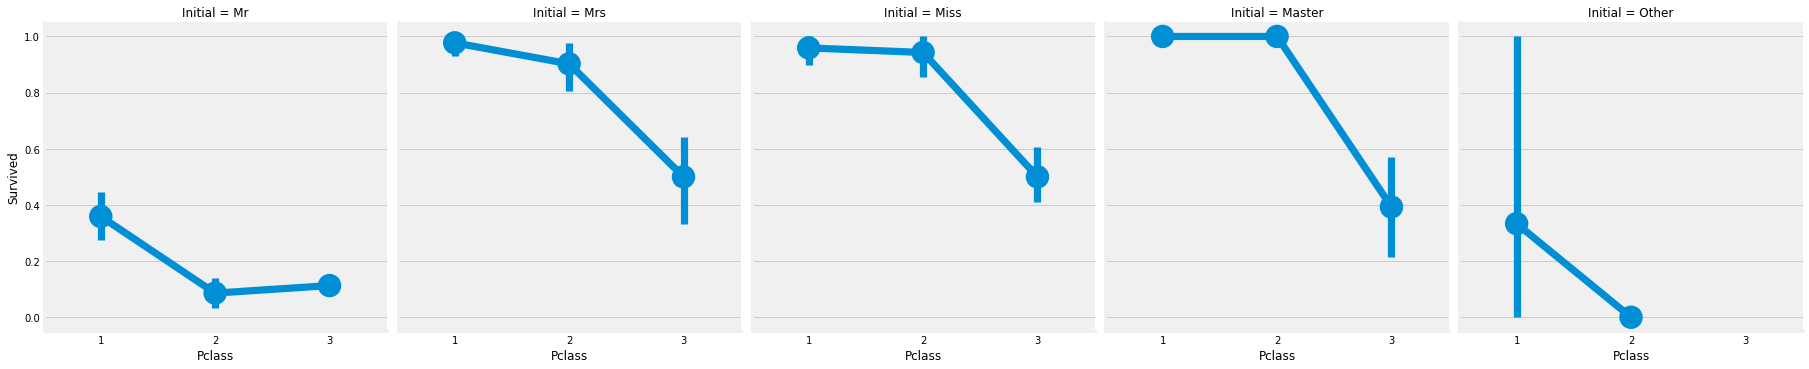

In [ ]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=train)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.  

*** Embarked -> Categorical Value**

In [ ]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port of Embarkation**

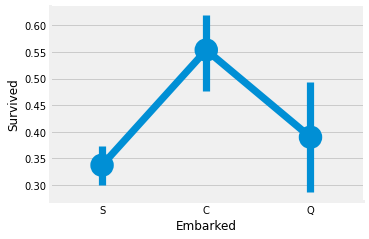

In [ ]:
sns.factorplot('Embarked', 'Survived', data=train)
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

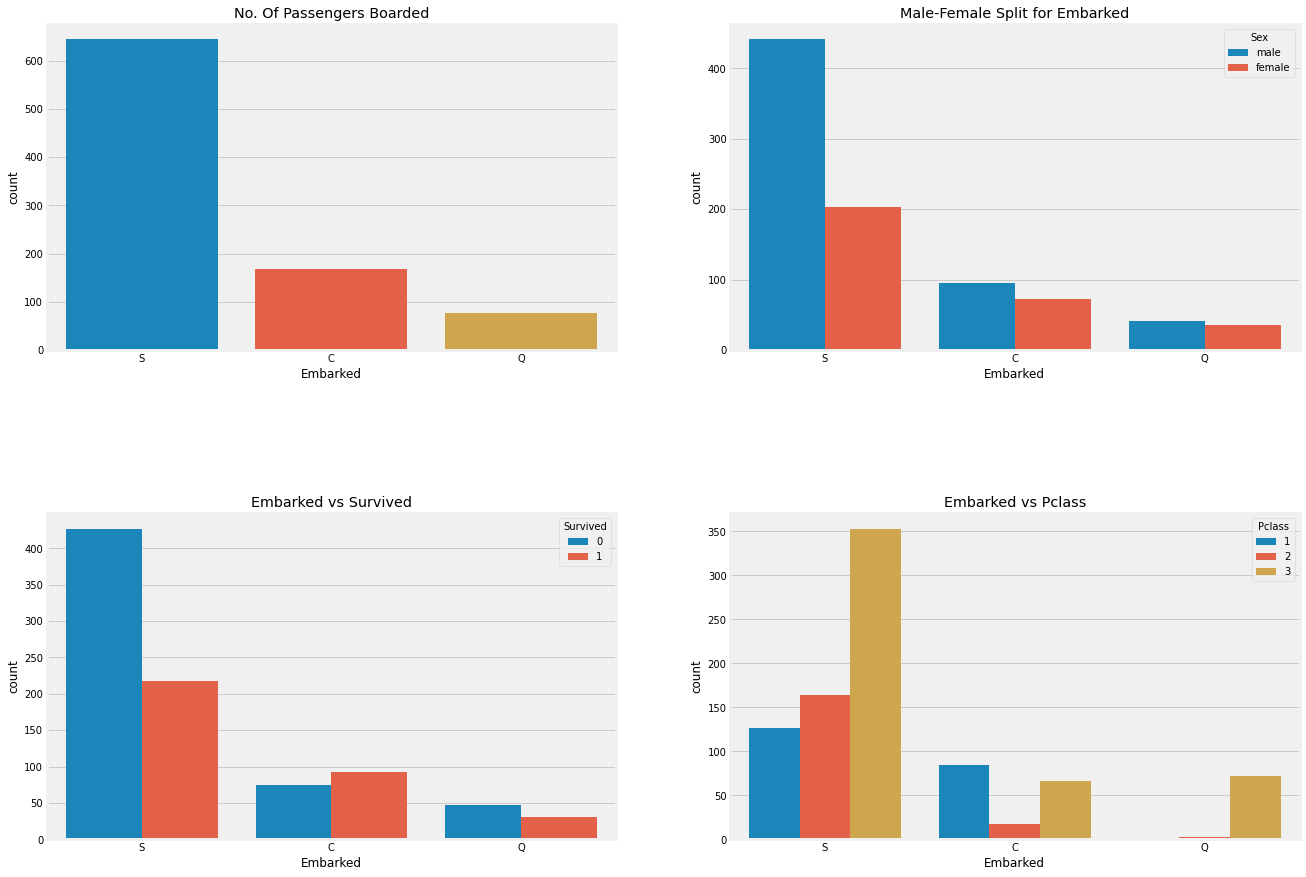

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**
- Maximum passengers boarded from S. Majority of them being from Pclass3.
- The passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 passengers.
- The Embark S looks to the port from where majority of the rich people boarded. Still the chances for surical is low here, that is vecause many passengers from Pclass 3 around 81% didn't survive.
- Port Q had almost 95% of the passengers were from Pclass 3.

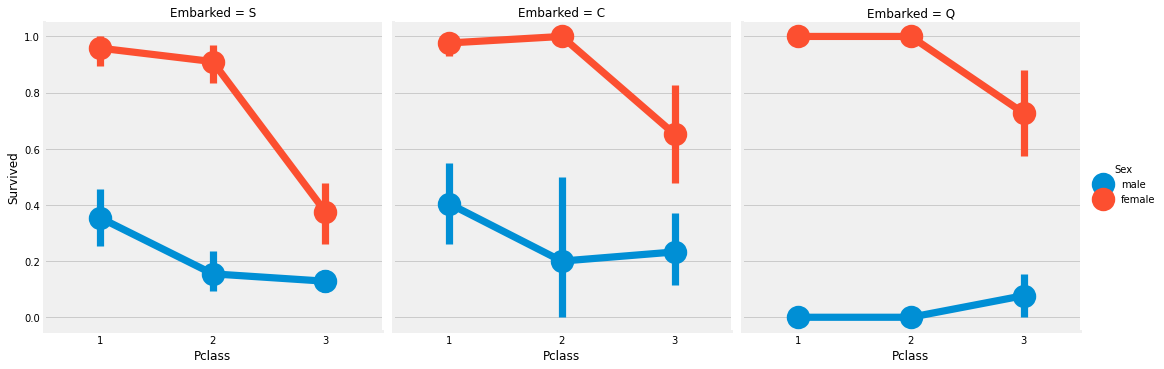

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train)
plt.show()

**0bservations:**
- The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the Pclass.
- Port S looks to be very unlucky for Pclass 3 passengers as the survival rate for both men and women is very low.(Money Matters)
- Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.  

<br>

**Filling Embarked NaN**  
As we saw that maximum passengers boarded from Port S, we replace NaN with S.


In [ ]:
train['Embarked'].fillna('S', inplace=True)

In [ ]:
train.Embarked.isnull().any() # Finally No NaN values

False

*** SibSip -> Discrete Feature**  
This feature represents whether a person is alone of with their family members.
<br>
- Sibling = brother, sister, stepbrother, stepsister  
- Spouse = husband, wife

In [ ]:
pd.crosstab([train.SibSp], train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


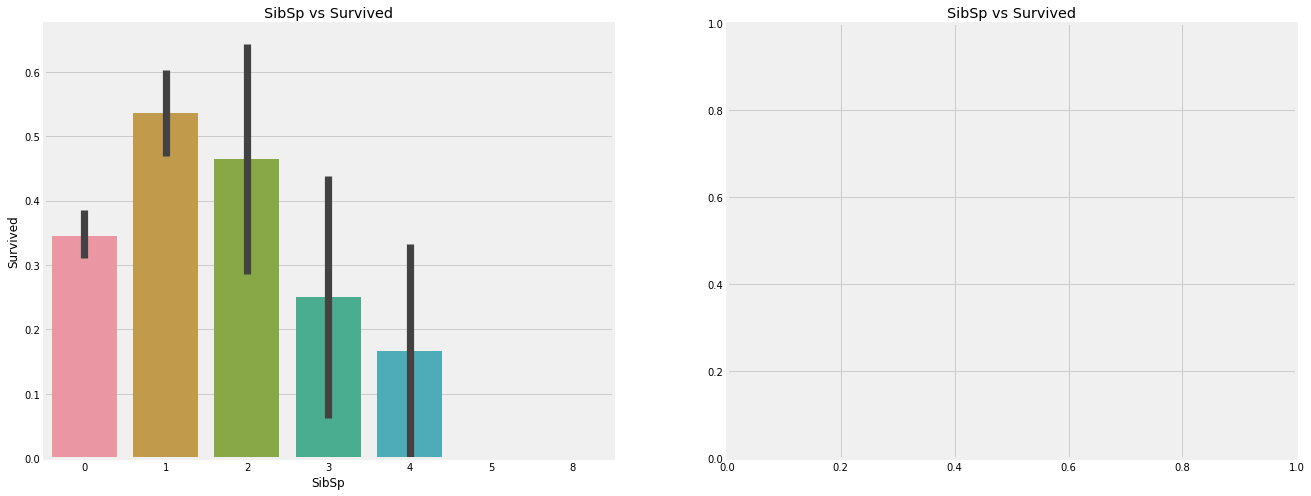

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data=train, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', data=train, ax=ax[1]) # 따로 실행하면 뜨는데 같이 하니까 안 뜸
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

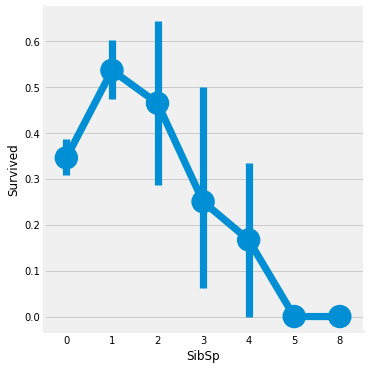

In [ ]:
# 따로 실행해본 그래프
sns.factorplot('SibSp','Survived', data=train, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**  
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.  
Surprisingly the survival for families with 5-8 memvers is 0%. The reason maybe Pclass?  
<br>
The reason is Pclass. The crosstab shows that Person with SipSp > 3 were all in Pclass 3. It is imminent that all the large families in Pclass3(> 3) died.

*** Parch**

In [ ]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass 3.

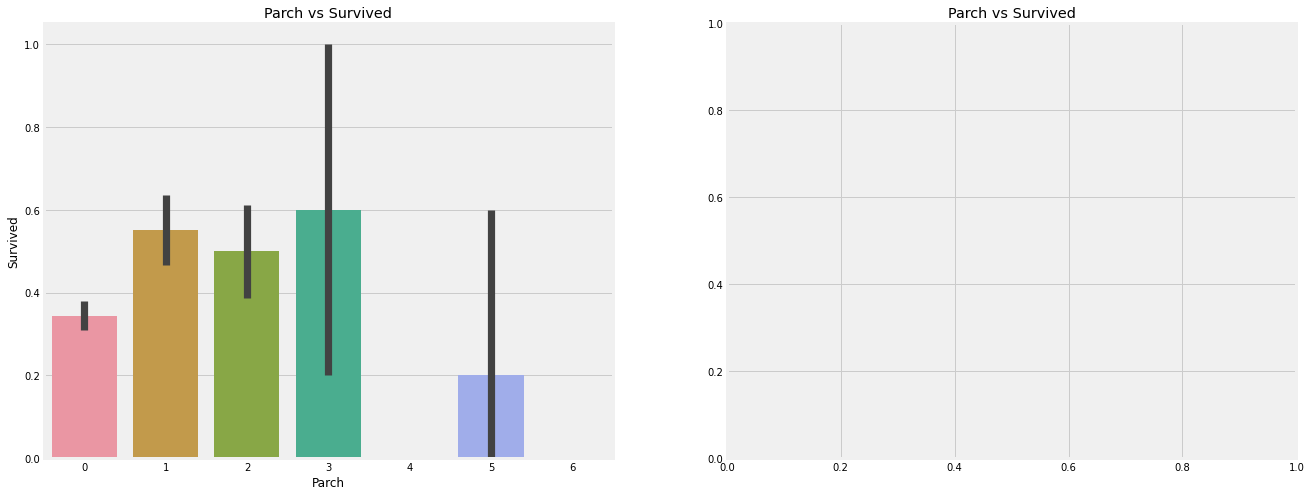

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

#### Part2: Feature Engineering and Data Cleaning
1. Adding any few features
2. Removing redundant features
3. Converting features into suitable from for modiling

#### Part3: Rredictive Modeling
1. Running Basic Algorithms
2. Cross Validation
3. Ensembling
4. Important Features Extraction